# 1. Install Dependencies and Setup

In [1]:
import tensorflow as tf
import os

In [2]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
tf.config.list_physical_devices('GPU')

[]

# 2. Remove unwanted images

In [13]:
import cv2
import imghdr

C:\Users\Manan\AppData\Local\Temp\ipykernel_13152\4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [14]:
data_dir = 'data' 

In [15]:
os.listdir('data')

['Angry', 'disgusted', 'happy', 'sad']

In [16]:
image_exts = ['jpeg','png', 'bmp', 'jpg']

In [17]:
from PIL import Image
import os

def convert_jpg_to_jpeg(file_path):

    with Image.open(file_path) as img:
        # Define the new file path with .jpeg extension
        new_file_path = os.path.splitext(file_path)[0] + '.jpeg'
        
        # Save the image in JPEG format
        img.convert('RGB').save(new_file_path, 'JPEG')
        
        # Optionally, remove the original .jpg file
        os.remove(file_path)
        
        print(f"Converted {file_path} to {new_file_path}")


In [18]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            tip = image_path.split(".")[-1].lower()
            if tip == 'jpg':
                convert_jpg_to_jpeg(image_path)
                
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
                print("removed")
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Converted data\disgusted\1000_F_279901841_EWor9twluoYStyzgL4KcEOTKHc4UKo7O.jpg to data\disgusted\1000_F_279901841_EWor9twluoYStyzgL4KcEOTKHc4UKo7O.jpeg
Converted data\disgusted\1000_F_334135310_fwYjpGrdACCsT76Y47Z8su8tk2Ef67Ab.jpg to data\disgusted\1000_F_334135310_fwYjpGrdACCsT76Y47Z8su8tk2Ef67Ab.jpeg
Converted data\disgusted\1000_F_418592378_lB5lTT8UCgCHhhPwNbu2xh51AZGnXBO8.jpg to data\disgusted\1000_F_418592378_lB5lTT8UCgCHhhPwNbu2xh51AZGnXBO8.jpeg
Converted data\disgusted\1000_F_564939400_pdN9Rya8KdCCwvi7MtIuZb7FiB8OnFzb.jpg to data\disgusted\1000_F_564939400_pdN9Rya8KdCCwvi7MtIuZb7FiB8OnFzb.jpeg
Converted data\disgusted\1000_F_63683783_Nwu3Bi8XeFoW7Dx5ETExYWIbJcEocMSq.jpg to data\disgusted\1000_F_63683783_Nwu3Bi8XeFoW7Dx5ETExYWIbJcEocMSq.jpeg
Converted data\disgusted\105928-103553.jpg to data\disgusted\105928-103553.jpeg
Converted data\disgusted\118618201-portrait-of-young-disgusted-african-man-with-stop-gesture-and-looking-away.jpg to data\disgusted\118618201-portrait-of-young-di

# 3. Load Data

In [19]:
import numpy as np
from matplotlib import pyplot as plt

In [20]:
tf.keras.utils.image_dataset_from_directory??

Signature:
tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)
Source:   
@keras_export(
    [
        "keras.utils.image_dataset_from_directory",
        "keras.preprocessing.image_dataset_from_directory",
    ]
)
def image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    ve

In [78]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 529 files belonging to 4 classes.


In [79]:
len(data)

17

In [23]:
#converting our data inoto a iteratior to access it by batches of 32 image and their labels
data_iterator = data.as_numpy_iterator()

In [24]:
data_iterator

NumpyIterator(iterator=<tensorflow.python.data.ops.iterator_ops.OwnedIterator object at 0x000001E80A025400>)

In [25]:
batch = data_iterator.next()
batch[0].shape

(32, 256, 256, 3)

In [26]:
batch[0][0]

array([[[130.7085  , 126.708496, 123.708496],
        [134.37451 , 130.37451 , 127.37451 ],
        [133.25    , 129.25    , 126.25    ],
        ...,
        [152.83203 , 149.83203 , 144.83203 ],
        [147.74805 , 144.74805 , 139.74805 ],
        [147.29053 , 144.29053 , 139.29053 ]],

       [[132.24805 , 128.24805 , 125.24805 ],
        [132.99805 , 128.99805 , 125.99805 ],
        [130.37354 , 126.373535, 123.373535],
        ...,
        [155.12451 , 152.12451 , 147.12451 ],
        [156.24805 , 153.24805 , 148.24805 ],
        [154.7461  , 151.7461  , 146.7461  ]],

       [[135.90527 , 131.90527 , 128.90527 ],
        [140.24023 , 136.24023 , 133.24023 ],
        [137.69775 , 133.69775 , 130.69775 ],
        ...,
        [156.29736 , 153.29736 , 148.29736 ],
        [156.66504 , 153.66504 , 148.66504 ],
        [154.58008 , 151.58008 , 146.58008 ]],

       ...,

       [[226.19287 , 222.19287 , 219.19287 ],
        [226.0376  , 222.0376  , 219.0376  ],
        [220.87256 , 2

Each batch contain, 32 images as numpy array respahed into 256x256x3 format and their labels.

In [27]:
batch[1]

array([0, 1, 3, 0, 3, 3, 1, 1, 3, 3, 1, 2, 1, 3, 1, 1, 3, 3, 3, 2, 3, 2,
       1, 0, 3, 0, 0, 0, 2, 2, 0, 3])

Lets check which label is assigned to which type of image

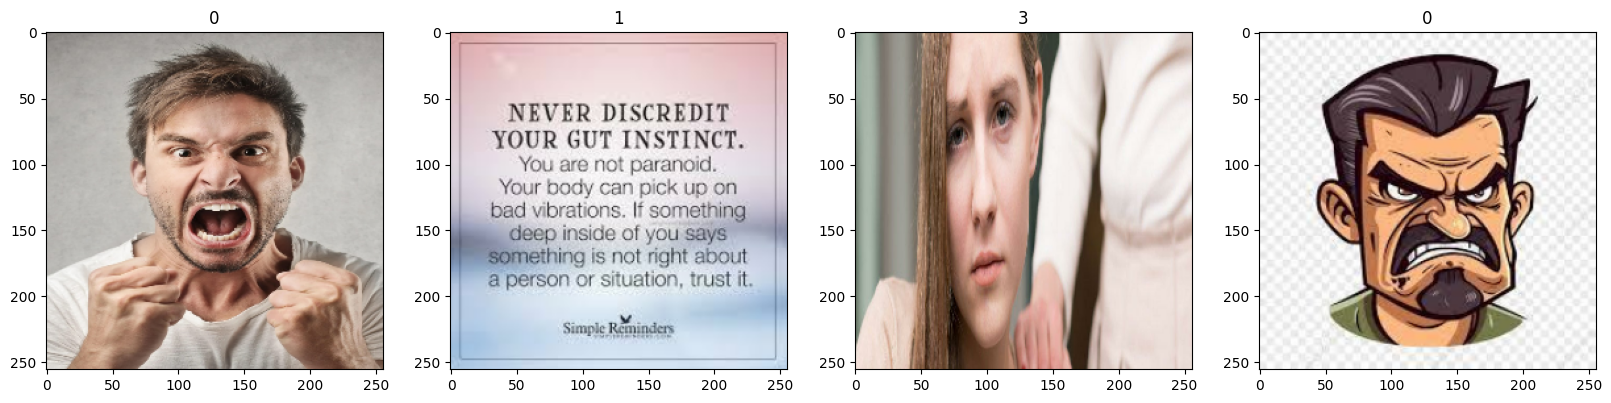

In [28]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][0:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

So we can clearly see that- 

- Label 0 is for Happy images
- Lavel 1 is for sad images

# 4. Normalizing Data

In [80]:
data_scaled = data.map(lambda x,y: (x/255, y))

In [81]:
data_scaled.as_numpy_iterator().next()

(array([[[[0.04169635, 0.07699046, 0.19678213],
          [0.05891353, 0.09812921, 0.20401156],
          [0.3351711 , 0.37564722, 0.46966863],
          ...,
          [0.05257353, 0.09963235, 0.20159313],
          [0.06825981, 0.10747549, 0.21335784],
          [0.0651348 , 0.10435049, 0.21023284]],
 
         [[0.3157509 , 0.35888815, 0.44516265],
          [0.0477496 , 0.08304372, 0.19676921],
          [0.0549685 , 0.09026262, 0.21780072],
          ...,
          [0.04633645, 0.09339528, 0.19535606],
          [0.05842524, 0.09764093, 0.20352328],
          [0.05392157, 0.09313726, 0.19901961]],
 
         [[0.09561408, 0.13482977, 0.24058957],
          [0.05102395, 0.08631808, 0.20004356],
          [0.05894608, 0.09481321, 0.20749703],
          ...,
          [0.07052696, 0.11758579, 0.21954657],
          [0.05991355, 0.09912923, 0.20501159],
          [0.06485907, 0.10407475, 0.20995711]],
 
         ...,
 
         [[0.13333334, 0.13333334, 0.13333334],
          [0.13333

# 5. Split Data

In [31]:
'''
# Load the dataset from a directory
train_dataset = tf.keras.utils.image_dataset_from_directory(
    'path_to_your_directory',  # Path to the main directory containing subdirectories of images
    image_size=(224, 224),     # Resize all images to this size
    batch_size=32,             # Number of images per batch
    shuffle=True,              # Shuffle the dataset
    validation_split=0.3,      # Split 30% of the data for validation
    subset='training',         # Specify whether this is the training subset
    seed=123                   # Random seed for reproducibility
)

# For validation dataset
validation_dataset = tf.keras.utils.image_dataset_from_directory(
    'path_to_your_directory',
    image_size=(224, 224),
    batch_size=32,
    shuffle=True,
    validation_split=0.3,
    subset='validation',
    seed=123
)
'''

"\n# Load the dataset from a directory\ntrain_dataset = tf.keras.utils.image_dataset_from_directory(\n    'path_to_your_directory',  # Path to the main directory containing subdirectories of images\n    image_size=(224, 224),     # Resize all images to this size\n    batch_size=32,             # Number of images per batch\n    shuffle=True,              # Shuffle the dataset\n    validation_split=0.3,      # Split 30% of the data for validation\n    subset='training',         # Specify whether this is the training subset\n    seed=123                   # Random seed for reproducibility\n)\n\n# For validation dataset\nvalidation_dataset = tf.keras.utils.image_dataset_from_directory(\n    'path_to_your_directory',\n    image_size=(224, 224),\n    batch_size=32,\n    shuffle=True,\n    validation_split=0.3,\n    subset='validation',\n    seed=123\n)\n"

In [82]:
# length of data in batches

len(data_scaled)

17

In [99]:
train_size = int(len(data)*0.7)
val_size = int(len(data)*0.2)
test_size = int(len(data)*0.1)

In [100]:
train_size, test_size, val_size

(11, 1, 3)

In [101]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [104]:
len(augmented_data)

11

In [86]:
len(train), len(val), len(test)

(11, 3, 1)

In [37]:
a =train

In [38]:
a

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

# 6. Build Deep Learning Model

In [39]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [89]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras import layers


In [90]:
output_units = len(os.listdir('data'))

In [105]:
data_augmentation = tf.keras.Sequential([
    
    layers.RandomFlip("horizontal_and_vertical"),  # Flip horizontally and vertically
    layers.RandomRotation(0.2),                    # Rotate by up to 20%
    layers.RandomZoom(0.2),                        # Zoom in by up to 20%
    layers.RandomContrast(0.2),                    # Adjust contrast by up to 20%
])

model = Sequential()

output_units = len(os.listdir('data')) #numbner of labels in our data



In [106]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(units=output_units, activation='softmax'))

c:\Users\Manan\projects\Image Classifier CNN\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [44]:
model.compile('adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [45]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,697,396 (14.10 MB)

 Trainable params: 3,697,396 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

# 7. Train

In [46]:
logdir='logs'

In [47]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [48]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 349ms/step - accuracy: 0.2297 - loss: 165.3937 - val_accuracy: 0.4062 - val_loss: 2.0530
Epoch 2/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 325ms/step - accuracy: 0.4249 - loss: 1.4884 - val_accuracy: 0.5833 - val_loss: 1.1409
Epoch 3/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 302ms/step - accuracy: 0.6273 - loss: 1.0307 - val_accuracy: 0.7188 - val_loss: 0.9306
Epoch 4/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 306ms/step - accuracy: 0.7236 - loss: 0.7784 - val_accuracy: 0.8542 - val_loss: 0.5181
Epoch 5/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 310ms/step - accuracy: 0.8306 - loss: 0.5494 - val_accuracy: 0.8854 - val_loss: 0.3653
Epoch 6/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 302ms/step - accuracy: 0.9086 - loss: 0.3478 - val_accuracy: 0.9062 - val_loss: 0.3104
Epoch 7/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 281ms/step - accuracy: 0.9435 - loss: 0.2740 - val_accuracy: 0.9583 - val_loss: 0.1433
Epoch 8/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 291ms/step - accuracy: 0.9471 - loss: 0.2699 - val_accuracy: 

# 8. Plot Performance

In [49]:
hist.history

{'accuracy': [0.27840909361839294,
  0.4630681872367859,
  0.6022727489471436,
  0.7301136255264282,
  0.8153409361839294,
  0.8977272510528564,
  0.9289772510528564,
  0.9460227489471436,
  0.9460227489471436,
  0.9630681872367859,
  0.9659090638160706,
  0.9744318127632141,
  0.9829545617103577,
  0.9886363744735718,
  0.9801136255264282,
  0.9857954382896423,
  0.9857954382896423,
  0.9886363744735718,
  0.9886363744735718,
  0.9857954382896423],
 'loss': [106.97032928466797,
  1.3459330797195435,
  1.025183081626892,
  0.7459378838539124,
  0.5915101766586304,
  0.3788459599018097,
  0.32348766922950745,
  0.27620506286621094,
  0.15541750192642212,
  0.13350753486156464,
  0.09692224860191345,
  0.07742337882518768,
  0.08354295045137405,
  0.03401978313922882,
  0.08303497731685638,
  0.05146465077996254,
  0.03756062686443329,
  0.03271894156932831,
  0.02408697083592415,
  0.041647106409072876],
 'val_accuracy': [0.40625,
  0.5833333134651184,
  0.71875,
  0.8541666865348816,
 

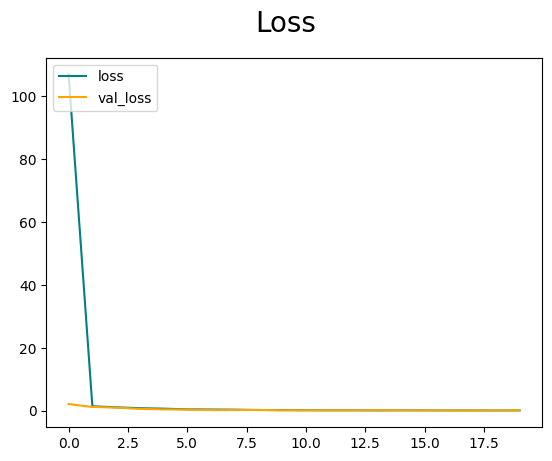

In [50]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

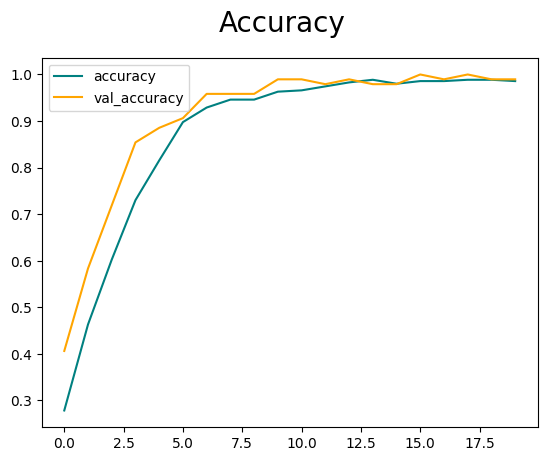

In [51]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [52]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [53]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [54]:
len(test)

1

In [56]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pred = []
    for ypred in yhat:
        pred.append(np.argmax(ypred))
    ped = np.array(pred)
    pre.update_state(y, pred)
    re.update_state(y, pred)
    acc.update_state(y, pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
[[1.22306519e-04 2.12163031e-05 4.00829049e-05 9.99816477e-01]
 [1.00000000e+00 1.33682721e-14 9.87200976e-15 3.54580219e-11]
 [3.11581598e-13 1.00000000e+00 1.11728431e-15 2.78631058e-17]
 [9.99999762e-01 7.37649231e-08 7.06980501e-08 1.09678933e-09]
 [3.45276232e-04 4.91168657e-06 3.18310718e-04 9.99331594e-01]
 [1.04829705e-04 1.94251768e-07 3.30207672e-06 9.99891639e-01]
 [1.00662534e-11 6.70681608e-33 2.50043144e-20 1.00000000e+00]
 [9.99754846e-01 2.44918541e-04 2.21129070e-11 1.76556924e-07]
 [2.14693341e-06 9.99995947e-01 1.54554516e-06 3.75051002e-07]
 [1.51226089e-08 9.56318427e-11 9.99999404e-01 6.02555019e-07]
 [9.99999642e-01 1.30175539e-15 3.06026237e-07 2.14481554e-15]
 [1.30970216e-06 5.19936199e-14 3.75037416e-16 9.99998689e-01]
 [2.42188322e-13 1.00000000e+00 1.08791597e-13 6.76620759e-09]
 [1.70841144e-04 1.21247895e-05 9.99811828e-01 5.27240991e-06]
 [2.42856774e-03 9.97474372e-01 8.86255366e-05 8.39162840e-06]
 [8.92803696e-17

In [57]:
print(pre.result().numpy(), re.result().numpy(), acc.result().numpy())

0.9583333 1.0 0.53125


In [77]:
print(pred)

[3, 0, 1, 0, 3, 3, 3, 0, 1, 2, 0, 3, 1, 2, 1, 2, 0, 1, 1, 0, 3, 0, 3, 2, 1, 1, 1, 3, 0, 2, 3, 3]


# 10. Test

In [58]:
import cv2

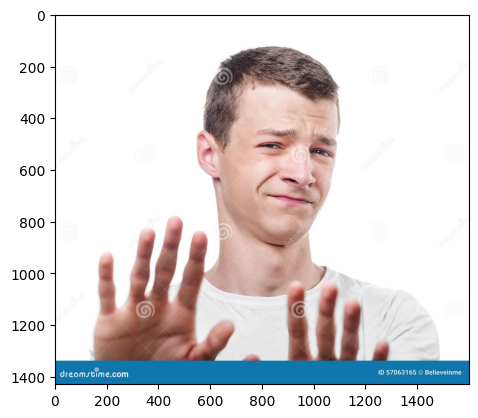

In [68]:
#cv2 imagwe are in BGR not in RGB color format so we need to change it if you want to see it properly

img = cv2.imread('disgusted-man-portrait-isolated-white-57063165.jpeg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

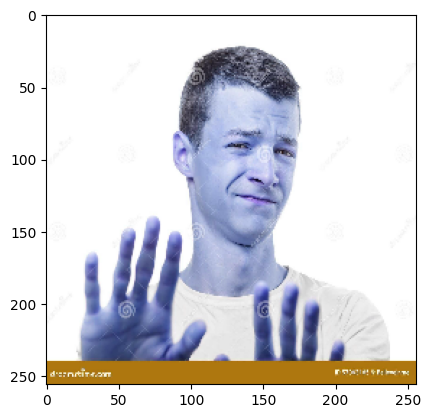

In [69]:
#resizeing our image to match the input of model
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [70]:
resize.shape

TensorShape([256, 256, 3])

In [71]:
np.expand_dims(resize, 0).shape

(1, 256, 256, 3)

We need to give our image as a batch of 1 image so for it we will add one more dimension to our image

In [72]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


In [73]:
yhat

array([[0.2257752 , 0.23616625, 0.24899721, 0.28906137]], dtype=float32)

In [74]:
labels = os.listdir('data')

In [75]:
index = np.argmax(yhat.reshape(-1))

In [76]:
print(f"Prediction is {labels[index]}")

Prediction is sad


# 11. Save the Model

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join('models','imageclassifiernew.keras'))

In [ ]:
new_model = load_model('imageclassifier.h5')

In [ ]:
new_model.predict(np.expand_dims(resize/255, 0))

array([[0.01972741]], dtype=float32)